In this post, you will learn how to create y-y plots with Python and Matplotlib.  y-y plots are a type of line plot where one line corresponds to one y-axis and another line on the same plot corresponds to a different y-axis. y-y plots typically have one vertical y-axis on the left edge of the plot and one vertical y-axis on the right edge of the plot. Each one of these y-axes can have different scales and can correspond to different units.

## Install Python, Matplotlib, NumPy, and Jupyter

We are going to build our y-y plot with Python and Matplotlib. Matplotlib is a popular plotting library for Python. Before we can build the plot, Python needs to be installed on our computer. See [this post](https://pythonforundergradengineers.com/installing-anaconda-on-windows.html) to review how to install Python. I recommend installing the [Anaconda](https://anaconda.com/distribution) distribution of Python, rather than installing Python from [Python.org](https://python.org).

Matplotlib can be installed using the **Anaconda Prompt** or using the command line and **pip**, the package manager for Python. Matplotlib comes pre-installed with the [Anaconda](https://anaconda.com/distribution) distribution of Python. If you are using the Anaconda distribution of Python, no further installation steps are necessary to use Matplotlib.

Two other libraries we will use to build the plot are NumPy and Jupyter.

Type the command below into the **Anaconda Prompt** to install Matplotlib, NumPy, and Jupyter.

```text
> conda install matplotlib numpy jupyter
```

The same three libraries can also be installed using a terminal and **pip**:

```text
$ pip install matplotlib numpy jupyter
```

We'll use a Jupyter notebook to build the y-y plot. A ```.py``` file could be used as well. The Python code is the same (except for the ```%matplotlib inline``` command). I like using Jupyter notebooks to build plots because of the quick feedback, in-line plotting, and ability to easily see which plot corresponds to a block of code. 

A new Jupyter notebook can be launched from the Anaconda Prompt or a terminal with the command:

```text
> jupyter notebook
```


## Imports

At the top of our Jupyter notebook, we'll include a section for imports. These import lines are necessary so that we can use Matplotlib and NumPy functions later in the script. Matplotlib will be used to build the plot. We will also use NumPy, a Python library for dealing with arrays to create our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The versions of Python, NumPy, and Matplotlib can be printed out using the following code:

In [2]:
import matplotlib
import sys

print(f'Python version {sys.version}')
print(f'Matplotlib version {matplotlib.__version__}')
print(f'NumPy version {np.__version__}')

Python version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Matplotlib version 3.3.4
NumPy version 1.19.2


## Data

We need data to include in our y-y plot. We'll start out by creating two NumPy arrays, one array for the sine function and one array for the exp function ($e^x$). These functions are good examples to use in a y-y plot because the range of values sin(x) and exp(x) output is very different.

In [3]:
x = np.arange(0,8*np.pi,0.1)
y1 = np.sin(x)
y2 = np.exp(x)

## Plot the two functions

Let's try and plot both of these functions. Each function can be plotted with Matplotlib's ```ax.plot()``` method. The two code cells below show a plot for each function in a separate figure window.

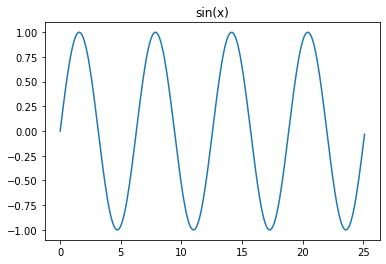

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y1)
ax.set_title('sin(x)')
plt.show()

Above, we see a plot of the sine function. Note the y-values in the plot are all between ```-1``` and ```1```. We can build a line plot of the exp function using very similar code.

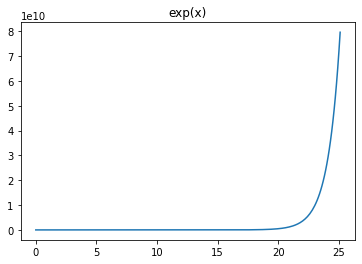

In [5]:
fig, ax = plt.subplots()
ax.plot(x,y2)
ax.set_title('exp(x)')
plt.show()

We see a plot of the exponential (exp) function. Note the y-values are between ```0``` and around ```8e10```. The range of y-values in the exp plot is **much** larger in the exp(x) plot than the range of values in the sin(x) plot.

Now let's try and plot these two functions on the same set of axes. The code below builds a plot with both functions on the same set of axes.

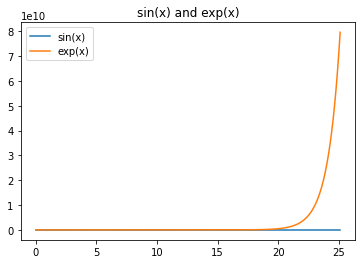

In [6]:
fig, ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
ax.set_title('sin(x) and exp(x)')
ax.legend(['sin(x)','exp(x)'])
plt.show()

We see a plot with two lines. The blue line represents the sine function and the orange line represents the exp function. Notice how the blue line looks flat. We can't see the variations in the sine wave.

## A figure with two subplots

One way we could view both functions at the same time is to use subplots. The code below builds a figure with two subplots, one function in each subplot.

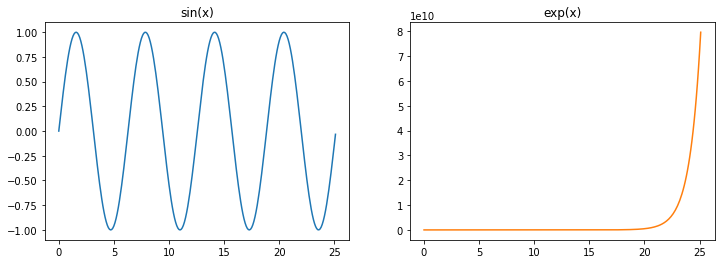

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax1.plot(x,y1)
ax1.set_title('sin(x)')

ax2.plot(x,y2,'C1')
ax2.set_title('exp(x)')

plt.show()

We see two plots side by side. Each plot shows a different function. The plot on the left shows the sine function, the plot on the right shows the exp function.

## y-y plot

Now let's combine these two plots on the same set of axes, but with two different y-axes. The y-axis on the left will correspond to the sine function. The y-axis on the right will correspond to the exp function. The key line of code is ```ax2 = ax1.twinx()```. This line of code creates a new axes object ```ax2``` that shares the same x-axis with ```ax1```. The ```.twinx()``` method is what allows us to create a y-y plot.

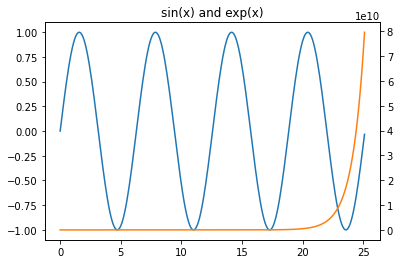

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(x,y1)
ax1.set_title('sin(x) and exp(x)')

ax2 = ax1.twinx()
ax2.plot(x,y2,'C1')

plt.show()

We see a plot of our two functions. In the plot above, we can clearly see both the sine function and the exp function. The y-axis that corresponds to the sine function is on the left. The y-axis that corresponds to the exp function is on the right.

Next, we'll color the axes and the axis labels to correspond to the line on the plot that it corresponds to.

## Color each y-axis

It's nice to be able to see the shape of both functions. However, it isn't obvious which function (which color line) corresponds to which axis. We can color the axis, tick marks, and tick labels to clearly demonstrate which line on the plot corresponds to which one of the y-axes.

Note that in the code below, we don't set the ```spines``` color to blue on ```ax1``` even though ```ax1``` contains the blue line. This is because after we plot on ```ax1```, the ```spines``` on ```ax2``` "overlap" the ```spines``` on ```ax1```. There is no overlap of ```tick_params```, so those can be set on ```ax1```.

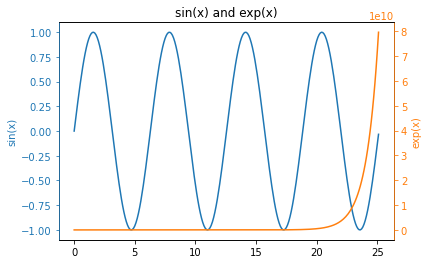

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(x,y1)
ax1.set_ylabel('sin(x)', color='C0')
ax1.tick_params(axis='y', color='C0', labelcolor='C0')

ax1.set_title('sin(x) and exp(x)')

ax2 = ax1.twinx()
ax2.plot(x,y2,'C1')
ax2.set_ylabel('exp(x)', color='C1')
ax2.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')

plt.show()

We see a plot with colored y-axis lines and colored y-axis labels. The blue line corresponds to the blue left-hand axis and labels. The orange line corresponds to the orange right-hand axis and labels.  

Next, we'll add a legend to our plot.

## Add a legend to the y-y plot

The color of the axis, tick marks, and tick labels correspond to the color of the line on our plot. But it would be nice to include a legend on the plot so that others could see which line corresponds to sine and which line corresponds to exp. 

The problem is that if we call ``` ax.legend(['sin','exp'])``` we only end up with a legend with one entry. To get around this problem, we apply the legend to the entire figure object ```fig```. The line ```fig.legend(['sin(x)','exp(x)']``` creates the legend. ```bbox_to_anchor=(0.9, 0.8))``` is added as a keyword argument to ensure the legend is within the space of the plot and not way off to the side. This is because we are applying the legend relative to the figure window and not relative to the axes.

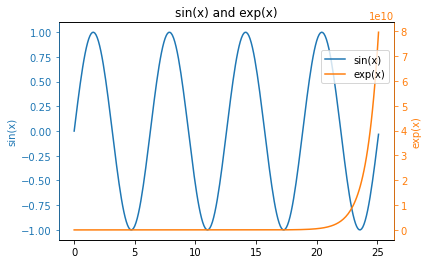

In [10]:
fig, ax1 = plt.subplots()

ax1.plot(x,y1)
ax1.set_ylabel('sin(x)', color='C0')
ax1.tick_params(axis='y', color='C0', labelcolor='C0')

ax1.set_title('sin(x) and exp(x)')

ax2 = ax1.twinx()
ax2.plot(x,y2,'C1')
ax2.set_ylabel('exp(x)', color='C1')
ax2.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')

fig.legend(['sin(x)','exp(x)'], bbox_to_anchor=(0.9, 0.8))

plt.show()

We see a plot with two lines, two different color y-axes, and a legend. One more thing we can try is to create the legend in an alternate way.

## Alternative way to add a legend to a y-y plot

An alternative way to add a legend to a y-y plot is to specify exactly which line objects should go into the legend. 

Usually, when the ```ax.plot()``` method is called, the output of it is not saved to a variable. But if we save the output of the ```ax.plot()``` method, we can feed it into our ```ax1.legend()``` call in order to specify which lines should be included in the legend. The key line in the code below is ```lines = line1 + line2```. Then we use the ```lines``` object when we call ```ax1.legend()```. The code below creates a y-y plot with a legend in an alternate way.

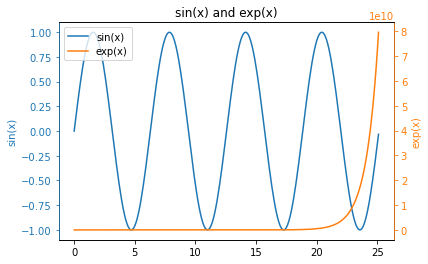

In [11]:
fig, ax1 = plt.subplots()

line1 = ax1.plot(x,y1)
ax1.set_ylabel('sin(x)', color='C0')
ax1.tick_params(axis='y', color='C0', labelcolor='C0')

ax1.set_title('sin(x) and exp(x)')

ax2 = ax1.twinx()
line2 = ax2.plot(x,y2,'C1')
ax2.set_ylabel('exp(x)', color='C1')
ax2.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')

lines = line1 + line2
ax2.legend(lines, ['sin(x)','exp(x)'])

plt.show()

We see a y-y plot with two colored y-axes and a legend in the upper-left corner.

## Summary

In this post, we constructed a y-y plot with Matplotlib and Python. y-y plots are useful when you have two sets of data that are in different scales. Matplotlib's ```ax2 = ax1.twinx()``` method was used to create our y-y plots. We customized the plots with colored y-axes and included a legend on the plots in two different ways.